# MID Project : 방한 외래 관광객 관광 행태 분석
<방한 외래 관광객 관광 행태 분석>: 방한 외래 관광객 수, 성별, 연령대별, 방문 목적, 방문 지역 추이 데이터를 바탕으로 외래관광객의 관광 패턴을 분석한다.

조사 기간: 2018년 ~2019년 2년 간 데이터

1. 방한 여행객의  숙박업소 유치를 위한 우리나라 숙박업소들에게 제공할 사이트
2. 각 나라별로 경제 성장률, 1인당 GDP, 물가상승률, 실업률, 환율과 방한 관광객 추이 및 지출경비 상관관계 분석. (외국인!!!!!!!!!!!!!!!!!!) 
3. 관광객 유치를 위해 타겟으로 삼아야할 광고수단,우리나라를 제일 많이 찾는 국가, 방한을 결심하게된 계기
4. 생각나는 아이디어 있으면 오전에 말하기!

# 성별 연령대별 방한 외래관광객 분석

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import plotly.express as px
# a

In [3]:
import koreanize_matplotlib

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'svg'
# retina보다 svg가 훨씬 선명하게 보인다

<AxesSubplot:title={'center':'한글'}>

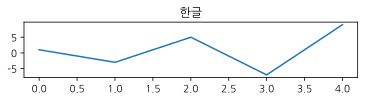

In [4]:
pd.Series([1,-3,5,-7,9]).plot(title='한글', figsize=(6,1))
# 마이너스 값도 잘 표시되는지 체크
# 한글이 깨지지 않는지 체크

## 파일 읽어오기

In [5]:
# 분석할 파일을 찾습니다.

glob("*입국*.csv")

['성별 입국_221019112506.csv', '연령별 입국_221019112619.csv']

In [6]:
# glob 결과 나온 파일을 변수에 할당해줍니다.

file_name1 = glob("*입국*.csv")[0]
file_name2 = glob("*입국*.csv")[1]

In [7]:
# 판다스로 첫번째 파일을 읽어옵니다.

df = pd.read_csv(file_name1, encoding='utf-8')
df

,성별,2018년01월,2018년02월,2018년03월,2018년04월,2018년05월,2018년06월,2018년07월,2018년08월,2018년09월,...,2019년05월,2019년06월,2019년07월,2019년08월,2019년09월,2019년10월,2019년11월,2019년12월,계,Unnamed: 26
0,NaN,인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),...,인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),NaN
1,남 성,"401,995","465,127","554,049","537,333","509,016","512,730","514,359","554,657","514,005",...,"578,778","564,968","557,943","608,589","574,479","623,952","557,064","560,601","12,997,488",NaN
2,여 성,"486,097","519,166","739,371","710,430","643,073","689,650","665,761","758,376","687,429",...,"809,257","827,189","809,558","867,890","801,593","937,993","819,922","816,840","17,891,172",NaN
3,승무원,"67,944","61,122","72,680","83,946","85,932","79,713","74,713","78,694","77,170",...,"97,649","84,061","80,566","109,820","83,592","94,250","79,443","79,447","1,960,975",NaN
4,전 체,"956,036","1,045,415","1,366,100","1,331,709","1,238,021","1,282,093","1,254,833","1,391,727","1,278,604",...,"1,485,684","1,476,218","1,448,067","1,586,299","1,459,664","1,656,195","1,456,429","1,456,888","32,849,635",NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# 판다스로 두번째 파일을 읽어옵니다.

df2 = pd.read_csv(file_name2, encoding='utf-8')
df2.head()

,연령별,2018년01월,2018년02월,2018년03월,2018년04월,2018년05월,2018년06월,2018년07월,2018년08월,2018년09월,...,2019년05월,2019년06월,2019년07월,2019년08월,2019년09월,2019년10월,2019년11월,2019년12월,계,Unnamed: 26
0,NaN,인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),...,인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),NaN
1,0 ~ 10,"25,714","35,757","32,663","36,221","28,113","40,491","57,969","59,960","29,349",...,"36,666","46,794","68,889","74,495","34,439","43,074","31,655","48,286","1,007,467",NaN
2,11 ~ 20,"49,448","69,347","100,206","51,485","49,855","87,692","130,158","162,486","65,877",...,"60,315","104,329","154,997","180,162","66,911","63,687","60,486","96,265","2,108,332",NaN
3,21 ~ 30,"244,706","281,742","354,209","309,195","299,161","315,499","288,227","345,341","349,991",...,"355,340","366,645","338,386","388,519","395,973","419,644","369,001","367,569","8,204,733",NaN
4,31 ~ 40,"222,457","224,125","293,052","300,869","271,514","271,103","248,997","263,416","276,077",...,"330,804","321,241","294,658","306,222","334,089","370,962","336,528","336,164","7,107,071",NaN


## 데이터 미리보기

### 요약정보 확인

In [9]:
df.shape

(6, 27)

In [10]:
df2.shape

(12, 27)

In [11]:
# 첫 번째 데이터의 요약정보를 확인합니다.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   성별           4 non-null      object 
 1   2018년01월     5 non-null      object 
 2   2018년02월     5 non-null      object 
 3   2018년03월     5 non-null      object 
 4   2018년04월     5 non-null      object 
 5   2018년05월     5 non-null      object 
 6   2018년06월     5 non-null      object 
 7   2018년07월     5 non-null      object 
 8   2018년08월     5 non-null      object 
 9   2018년09월     5 non-null      object 
 10  2018년10월     5 non-null      object 
 11  2018년11월     5 non-null      object 
 12  2018년12월     5 non-null      object 
 13  2019년01월     5 non-null      object 
 14  2019년02월     5 non-null      object 
 15  2019년03월     5 non-null      object 
 16  2019년04월     5 non-null      object 
 17  2019년05월     5 non-null      object 
 18  2019년06월     5 non-null      object 
 19  2019년07월    

In [12]:
# 두 번째 데이터의 요약정보를 확인합니다.

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   연령별          10 non-null     object 
 1   2018년01월     11 non-null     object 
 2   2018년02월     11 non-null     object 
 3   2018년03월     11 non-null     object 
 4   2018년04월     11 non-null     object 
 5   2018년05월     11 non-null     object 
 6   2018년06월     11 non-null     object 
 7   2018년07월     11 non-null     object 
 8   2018년08월     11 non-null     object 
 9   2018년09월     11 non-null     object 
 10  2018년10월     11 non-null     object 
 11  2018년11월     11 non-null     object 
 12  2018년12월     11 non-null     object 
 13  2019년01월     11 non-null     object 
 14  2019년02월     11 non-null     object 
 15  2019년03월     11 non-null     object 
 16  2019년04월     11 non-null     object 
 17  2019년05월     11 non-null     object 
 18  2019년06월     11 non-null     object 
 19  2019년07월  

### 결측치 확인

In [13]:
df.isna().sum()

성별             2
2018년01월       1
2018년02월       1
2018년03월       1
2018년04월       1
2018년05월       1
2018년06월       1
2018년07월       1
2018년08월       1
2018년09월       1
2018년10월       1
2018년11월       1
2018년12월       1
2019년01월       1
2019년02월       1
2019년03월       1
2019년04월       1
2019년05월       1
2019년06월       1
2019년07월       1
2019년08월       1
2019년09월       1
2019년10월       1
2019년11월       1
2019년12월       1
계              1
Unnamed: 26    6
dtype: int64

In [14]:
df2.isnull().sum()

연령별             2
2018년01월        1
2018년02월        1
2018년03월        1
2018년04월        1
2018년05월        1
2018년06월        1
2018년07월        1
2018년08월        1
2018년09월        1
2018년10월        1
2018년11월        1
2018년12월        1
2019년01월        1
2019년02월        1
2019년03월        1
2019년04월        1
2019년05월        1
2019년06월        1
2019년07월        1
2019년08월        1
2019년09월        1
2019년10월        1
2019년11월        1
2019년12월        1
계               1
Unnamed: 26    12
dtype: int64

<AxesSubplot:>

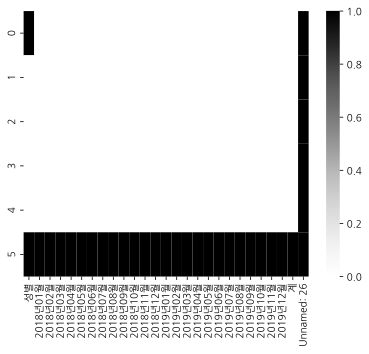

In [15]:
# 시각화하여 위에서 확인한 결측치의 위치를 파악합니다.
# unnamed: 26이라는 빈 컬럼이 포함된 것을 확인할 수 있습니다.

sns.heatmap(df.isnull(), cmap='Greys')

<AxesSubplot:>

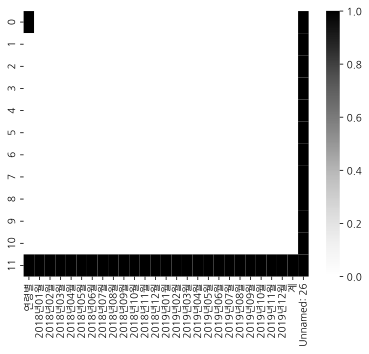

In [16]:
# 두 번째 데이터도 시각화하여 위에서 확인한 결측치의 위치를 파악합니다.
# 역시 unnamed:26이라는 빈 컬럼이 포함된 것을 확인할 수 있습니다.

sns.heatmap(df2.isna(), cmap='Greys')

### 중복값 확인

In [17]:
# 첫번째 데이터셋의 중복값이 없는 것을 확인합니다.

df = df.drop_duplicates()
df.shape

(6, 27)

In [18]:
# 두 번째 데이터셋의 중복값이 없는 것을 확인합니다.

df2[df2.duplicated()]
df2.shape

(12, 27)

## 전처리(1) 성별 입국

### 불필요한 행, 열 제거

In [19]:
# 불필요한 행을 제거합니다.

df = df.drop([0, 3, 4, 5], axis=0)
df

,성별,2018년01월,2018년02월,2018년03월,2018년04월,2018년05월,2018년06월,2018년07월,2018년08월,2018년09월,...,2019년05월,2019년06월,2019년07월,2019년08월,2019년09월,2019년10월,2019년11월,2019년12월,계,Unnamed: 26
1,남 성,"401,995","465,127","554,049","537,333","509,016","512,730","514,359","554,657","514,005",...,"578,778","564,968","557,943","608,589","574,479","623,952","557,064","560,601","12,997,488",NaN
2,여 성,"486,097","519,166","739,371","710,430","643,073","689,650","665,761","758,376","687,429",...,"809,257","827,189","809,558","867,890","801,593","937,993","819,922","816,840","17,891,172",NaN


In [20]:
# 불필요한 컬럼을 제거하기 위해 columns을 확인합니다.

df.columns

Index(['성별', '2018년01월', '2018년02월', '2018년03월', '2018년04월', '2018년05월',
       '2018년06월', '2018년07월', '2018년08월', '2018년09월', '2018년10월', '2018년11월',
       '2018년12월', '2019년01월', '2019년02월', '2019년03월', '2019년04월', '2019년05월',
       '2019년06월', '2019년07월', '2019년08월', '2019년09월', '2019년10월', '2019년11월',
       '2019년12월', '계', 'Unnamed: 26'],
      dtype='object')

In [21]:
# 불필요한 컬럼을 제거합니다.

df = df.drop(['계', 'Unnamed: 26'], axis=1)
df

,성별,2018년01월,2018년02월,2018년03월,2018년04월,2018년05월,2018년06월,2018년07월,2018년08월,2018년09월,...,2019년03월,2019년04월,2019년05월,2019년06월,2019년07월,2019년08월,2019년09월,2019년10월,2019년11월,2019년12월
1,남 성,"401,995","465,127","554,049","537,333","509,016","512,730","514,359","554,657","514,005",...,"576,167","628,813","578,778","564,968","557,943","608,589","574,479","623,952","557,064","560,601"
2,여 성,"486,097","519,166","739,371","710,430","643,073","689,650","665,761","758,376","687,429",...,"876,370","907,761","809,257","827,189","809,558","867,890","801,593","937,993","819,922","816,840"


### tidy data 만들기

In [22]:
# melt를 이용해 long form 형태로 데이터를 만들어줍니다.
# 어떤 variable과 value가 나오는지 확인합니다.

pd.melt(df, id_vars=['성별'])

,성별,variable,value
0,남 성,2018년01월,"401,995"
1,여 성,2018년01월,"486,097"
2,남 성,2018년02월,"465,127"
3,여 성,2018년02월,"519,166"
4,남 성,2018년03월,"554,049"
5,여 성,2018년03월,"739,371"
6,남 성,2018년04월,"537,333"
7,여 성,2018년04월,"710,430"
8,남 성,2018년05월,"509,016"
9,여 성,2018년05월,"643,073"


In [23]:
#위에서 확인한 var, value에 알맞은 컬럼명을 지정해줍니다.

entry_gender = pd.melt(df, id_vars=df.columns[0], var_name='연도월', value_name='인원수')
entry_gender.head(3)

,성별,연도월,인원수
0,남 성,2018년01월,"401,995"
1,여 성,2018년01월,"486,097"
2,남 성,2018년02월,"465,127"


### 컬럼순서 변경하기

In [24]:
# 보기 편한 형태로 컬럼순서를 변경해줍니다.

entry_gender = entry_gender[['연도월','성별','인원수']]

### 연도월 컬럼에서 파생변수 만들기

In [25]:
# 연도를 parsing하는 함수를 생성합니다.

def parse_year(date):
    return int(date.split('년')[0])

In [26]:
# 월을 parsing하는 함수를 생성합니다.

def parse_month(date):
    return int(date.split('년')[1][:-1])

In [27]:
# 함수를 적용하여 연도, 월 컬럼을 생성합니다.

entry_gender['연도'] = entry_gender['연도월'].apply(parse_year)
entry_gender['월'] = entry_gender['연도월'].apply(parse_month)
entry_gender.head(3)

,연도월,성별,인원수,연도,월
0,2018년01월,남 성,"401,995",2018,1
1,2018년01월,여 성,"486,097",2018,1
2,2018년02월,남 성,"465,127",2018,2


In [28]:
# 변환 결과를 확인합니다.

entry_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연도월     48 non-null     object
 1   성별      48 non-null     object
 2   인원수     48 non-null     object
 3   연도      48 non-null     int64 
 4   월       48 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.0+ KB


## 전처리(2) 연령별 입국

### 불필요한 행, 열 제거

In [29]:
# 인원수(명)과 NaN값이 들어있던 행을 삭제합니다.

df2 = df2.drop([0, 9, 10, 11],axis=0)
df2

,연령별,2018년01월,2018년02월,2018년03월,2018년04월,2018년05월,2018년06월,2018년07월,2018년08월,2018년09월,...,2019년05월,2019년06월,2019년07월,2019년08월,2019년09월,2019년10월,2019년11월,2019년12월,계,Unnamed: 26
1,0 ~ 10,"25,714","35,757","32,663","36,221","28,113","40,491","57,969","59,960","29,349",...,"36,666","46,794","68,889","74,495","34,439","43,074","31,655","48,286","1,007,467",NaN
2,11 ~ 20,"49,448","69,347","100,206","51,485","49,855","87,692","130,158","162,486","65,877",...,"60,315","104,329","154,997","180,162","66,911","63,687","60,486","96,265","2,108,332",NaN
3,21 ~ 30,"244,706","281,742","354,209","309,195","299,161","315,499","288,227","345,341","349,991",...,"355,340","366,645","338,386","388,519","395,973","419,644","369,001","367,569","8,204,733",NaN
4,31 ~ 40,"222,457","224,125","293,052","300,869","271,514","271,103","248,997","263,416","276,077",...,"330,804","321,241","294,658","306,222","334,089","370,962","336,528","336,164","7,107,071",NaN
5,41 ~ 50,"153,900","169,186","216,058","210,037","194,196","202,267","205,359","217,090","186,398",...,"223,868","227,462","229,796","237,245","207,976","242,953","226,059","225,284","5,076,504",NaN
6,51 ~ 60,"119,587","128,404","176,522","186,146","172,166","165,374","149,779","158,837","169,029",...,"203,232","184,956","164,816","170,298","187,687","227,597","199,121","175,466","4,214,395",NaN
7,61 ~ 70,"58,714","60,766","95,588","116,359","103,670","92,262","78,747","82,610","97,182",...,"134,722","108,614","91,787","93,015","115,313","149,796","123,587","103,459","2,475,844",NaN
8,71 ~,"13,566","14,966","25,122","37,451","33,414","27,692","20,884","23,293","27,531",...,"43,088","32,116","24,172","26,523","33,684","44,232","30,549","24,948","694,314",NaN


In [30]:
# 제거할 컬럼명을 확인합니다.

df2.columns

Index(['연령별', '2018년01월', '2018년02월', '2018년03월', '2018년04월', '2018년05월',
       '2018년06월', '2018년07월', '2018년08월', '2018년09월', '2018년10월', '2018년11월',
       '2018년12월', '2019년01월', '2019년02월', '2019년03월', '2019년04월', '2019년05월',
       '2019년06월', '2019년07월', '2019년08월', '2019년09월', '2019년10월', '2019년11월',
       '2019년12월', '계', 'Unnamed: 26'],
      dtype='object')

In [31]:
# 불필요한 컬럼을 제거해줍니다.

df2.drop(['계', 'Unnamed: 26'],axis=1, inplace=True)

In [32]:
# 결과를 확인합니다.

df2

,연령별,2018년01월,2018년02월,2018년03월,2018년04월,2018년05월,2018년06월,2018년07월,2018년08월,2018년09월,...,2019년03월,2019년04월,2019년05월,2019년06월,2019년07월,2019년08월,2019년09월,2019년10월,2019년11월,2019년12월
1,0 ~ 10,"25,714","35,757","32,663","36,221","28,113","40,491","57,969","59,960","29,349",...,"32,866","50,923","36,666","46,794","68,889","74,495","34,439","43,074","31,655","48,286"
2,11 ~ 20,"49,448","69,347","100,206","51,485","49,855","87,692","130,158","162,486","65,877",...,"117,208","73,436","60,315","104,329","154,997","180,162","66,911","63,687","60,486","96,265"
3,21 ~ 30,"244,706","281,742","354,209","309,195","299,161","315,499","288,227","345,341","349,991",...,"389,904","371,597","355,340","366,645","338,386","388,519","395,973","419,644","369,001","367,569"
4,31 ~ 40,"222,457","224,125","293,052","300,869","271,514","271,103","248,997","263,416","276,077",...,"321,264","365,298","330,804","321,241","294,658","306,222","334,089","370,962","336,528","336,164"
5,41 ~ 50,"153,900","169,186","216,058","210,037","194,196","202,267","205,359","217,090","186,398",...,"230,985","251,225","223,868","227,462","229,796","237,245","207,976","242,953","226,059","225,284"
6,51 ~ 60,"119,587","128,404","176,522","186,146","172,166","165,374","149,779","158,837","169,029",...,"200,310","223,030","203,232","184,956","164,816","170,298","187,687","227,597","199,121","175,466"
7,61 ~ 70,"58,714","60,766","95,588","116,359","103,670","92,262","78,747","82,610","97,182",...,"126,186","151,424","134,722","108,614","91,787","93,015","115,313","149,796","123,587","103,459"
8,71 ~,"13,566","14,966","25,122","37,451","33,414","27,692","20,884","23,293","27,531",...,"33,814","49,641","43,088","32,116","24,172","26,523","33,684","44,232","30,549","24,948"


### tidy data 만들기

In [33]:
# melt를 이용해 tidy data로 만들어줍니다.
# 어떤 variable과 value가 만들어지는지 확인합니다.

pd.melt(df2, id_vars='연령별')

,연령별,variable,value
0,0 ~ 10,2018년01월,"25,714"
1,11 ~ 20,2018년01월,"49,448"
2,21 ~ 30,2018년01월,"244,706"
3,31 ~ 40,2018년01월,"222,457"
4,41 ~ 50,2018년01월,"153,900"
...,...,...,...
187,31 ~ 40,2019년12월,"336,164"
188,41 ~ 50,2019년12월,"225,284"
189,51 ~ 60,2019년12월,"175,466"
190,61 ~ 70,2019년12월,"103,459"


In [34]:
# 위에서 확인한 var과 value에 적절한 컬럼명을 지정해줍니다.

entry_age = pd.melt(df2, id_vars='연령별', var_name='연도월', value_name='인원수')
entry_age

,연령별,연도월,인원수
0,0 ~ 10,2018년01월,"25,714"
1,11 ~ 20,2018년01월,"49,448"
2,21 ~ 30,2018년01월,"244,706"
3,31 ~ 40,2018년01월,"222,457"
4,41 ~ 50,2018년01월,"153,900"
...,...,...,...
187,31 ~ 40,2019년12월,"336,164"
188,41 ~ 50,2019년12월,"225,284"
189,51 ~ 60,2019년12월,"175,466"
190,61 ~ 70,2019년12월,"103,459"


### 컬럼순서 변경하기

In [35]:
entry_age = entry_age[['연도월','연령별','인원수']]
entry_age.head(1)

,연도월,연령별,인원수
0,2018년01월,0 ~ 10,"25,714"


### 데이터타입 변환하기

In [36]:
# 변경 전 데이터타입을 확인합니다.

entry_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연도월     192 non-null    object
 1   연령별     192 non-null    object
 2   인원수     192 non-null    object
dtypes: object(3)
memory usage: 4.6+ KB


In [37]:
# 시각화에 적절한 타입으로 변환해줍니다.

entry_age['인원수'] = entry_age['인원수'].str.replace(',','')
entry_age['인원수'] = entry_age['인원수'].astype(int)

In [38]:
# 변경 후 데이터타입을 확인합니다.

entry_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연도월     192 non-null    object
 1   연령별     192 non-null    object
 2   인원수     192 non-null    int32 
dtypes: int32(1), object(2)
memory usage: 3.9+ KB


### 연도월 컬럼에서 파생변수 생성하기

In [39]:
# 연도 파생변수를 생성해줍니다.

entry_age['연도'] = entry_age['연도월'].str[:4].astype(int)
entry_age.head(2)

,연도월,연령별,인원수,연도
0,2018년01월,0 ~ 10,25714,2018
1,2018년01월,11 ~ 20,49448,2018


## 분석 및 시각화

### 성별 외래 관광객 입국 추이

In [40]:
# 인원수를 시각화에 적절한 타입(int)으로 변환해줍니다.

entry_gender['인원수'] = entry_gender['인원수'].str.replace(',','')
entry_gender['인원수'] = pd.to_numeric(entry_gender['인원수'])
entry_gender.head(3)

,연도월,성별,인원수,연도,월
0,2018년01월,남 성,401995,2018,1
1,2018년01월,여 성,486097,2018,1
2,2018년02월,남 성,465127,2018,2


In [41]:
# 변환 결과를 확인합니다.

entry_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연도월     48 non-null     object
 1   성별      48 non-null     object
 2   인원수     48 non-null     int64 
 3   연도      48 non-null     int64 
 4   월       48 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.0+ KB


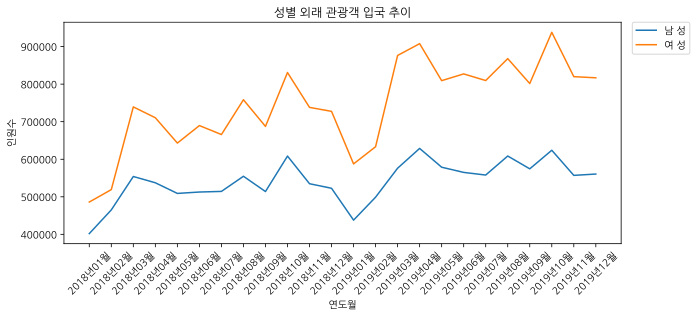

In [42]:
# 성별에 따른 방한 외래 관광객 인원수를 시계열로 시각화합니다.

plt.figure(figsize=(10,4))
tourist_sex = sns.lineplot(data=entry_gender, x='연도월', y='인원수', hue='성별', errorbar = None);
tourist_sex.set_title('성별 외래 관광객 입국 추이')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45);

### 18년 19년 연령대별 외래 관광객 입국인원 비교

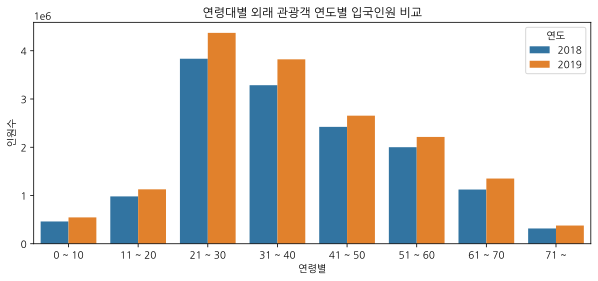

In [43]:
plt.figure(figsize=(10,4))
tourist_age = sns.barplot(data=entry_age.sort_values('연령별'), x='연령별', y='인원수', hue='연도', errorbar = None, estimator=np.sum)
tourist_age.set_title('연령대별 외래 관광객 연도별 입국인원 비교');